<a href="https://colab.research.google.com/github/asim077/Data-Science-project/blob/main/Customer%20Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation
# Problem: Strategic Planning for a New Shopping Mall
A new shopping mall owner aims to maximize revenue by effectively targeting the right audience and products. Currently, there's no clear strategy on which products to focus on to boost sales and attract customers. The owner needs a data-driven approach to understand customer segments, identify high-potential products, and develop a targeted marketing strategy.

# Key Objectives:
**Identify Audience Segments:** Determine key customer demographics and preferences to tailor the mall's offerings and marketing efforts.
**Target Products for Growth:** Pinpoint specific product categories that have the highest potential to drive sales and attract the desired customer segments.

**Steps to Address the Problem:**
1.** Data Collection and Analysis**:
Collect data
**Analyze Spending Patterns:** Analyze the collected data to identify correlations between customer segments and product categories. Determine which categories generate the highest sales and which customer segments contribute most to those sales.
**Segmentation Analysis**: Employ clustering techniques (e.g., K-Means) to group customers based on shared characteristics and spending behaviors. This will help define distinct audience segments with unique needs and preferences.

In [95]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# **Data PreProcessing**

# **Data** loading

In [97]:
data= pd.read_csv('/customer_shopping_data.csv')
data.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


# Checking info about Data

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# **Droping the character from columns Invoice_no and customer_id**

In [99]:
data['invoice_no'] = data['invoice_no'].str.replace('I', '')
data['customer_id'] = data['customer_id'].str.replace('C', '')

In [100]:
data.tail(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99447,281214,288090,Female,37,Toys,3,107.52,Cash,21/02/2021,Metropol AVM
99448,332105,231387,Female,65,Shoes,4,2400.68,Credit Card,29/08/2021,Metropol AVM
99449,134399,953724,Male,65,Clothing,1,300.08,Cash,1/1/2023,Kanyon
99450,170504,226974,Female,28,Books,1,15.15,Cash,28/02/2023,Zorlu Center
99451,675411,513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,219422,441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,325143,569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,824010,103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,702964,800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,232867,273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [11]:
data['invoice_no'] = pd.to_numeric(data['invoice_no'], errors='coerce').astype('Int64')
data['customer_id'] = pd.to_numeric(data['customer_id'], errors='coerce').astype('Int64')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [103]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [104]:
data.describe(include='object').T

,count,unique,top,freq
invoice_no,99457,99457,138884,1
customer_id,99457,99457,241288,1
gender,99457,2,Female,59482
category,99457,8,Clothing,34487
payment_method,99457,3,Cash,44447
invoice_date,99457,797,24/11/2021,159
shopping_mall,99457,10,Mall of Istanbul,19943


# gender:

count: 99,457 - There are 99,457 entries in the gender column.
unique: 2 - There are 2 unique values in the gender column (presumably "Male" and "Female").
top: Female - The most frequent value in the gender column is "Female".
freq: 59,482 - The value "Female" appears 59,482 times in the gender column.

# category:

count: 99,457 - There are 99,457 entries in the category column.
unique: 8 - There are 8 unique values in the category column.
top: Clothing - The most frequent value in the category column is "Clothing".
freq: 34,487 - The value "Clothing" appears 34,487 times in the category column.

# payment_method:
count: 99,457 - There are 99,457 entries in the payment_method column.
unique: 3 - There are 3 unique values in the payment_method column.
top: Cash - The most frequent value in the payment_method column is "Cash".
freq: 44,447 - The value "Cash" appears 44,447 times in the payment_method column.

# invoice_date:
count: 99,457 - There are 99,457 entries in the invoice_date column.
unique: 797 - There are 797 unique dates in the invoice_date column.
top: 24/11/2021 - The most frequent date in the invoice_date column is "24/11/2021".
freq: 159 - The date "24/11/2021" appears 159 times in the invoice_date column.

# shopping_mall:
count: 99,457 - There are 99,457 entries in the shopping_mall column.
unique: 10 - There are 10 unique shopping malls in the shopping_mall column.
top: Mall of Istanbul - The most frequent shopping mall in the shopping_mall column is "Mall of Istanbul".
freq: 19,943 - The value "Mall of Istanbul" appears 19,943 times in the shopping_mall column.

# Interpretation and Insights

## Gender Distribution:
The dataset is predominantly female, with females making up a significant portion of the entries (59,482 out of 99,457).

## Category Preference:
"Clothing" is the most popular category, with a large number of transactions (34,487 out of 99,457).

## Payment Method Usage:
"Cash" is the most frequently used payment method, highlighting a preference for cash transactions (44,447 out of 99,457).

## Sales on Specific Date:
The date "24/11/2021" saw the highest number of transactions (159), indicating a potentially significant event or promotion on that day.

## Shopping Mall Popularity:
"Mall of Istanbul" is the most frequented mall, with the highest number of transactions (19,943 out of 99,457).

These are the valuable for understanding customer behavior, planning inventory, designing targeted marketing campaigns, and optimizing store operations.


# Checking Null Values

In [105]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [106]:
print(f"The dataset contains {data.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 0 duplicate rows that need to be removed.


In [107]:
data.shape[0]

99457

In [108]:
data.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,138884,241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,317333,111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,127801,266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,173702,988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,337046,189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# Insights From Data Preprocessing
There is no Null values all data type has been fixed and change accrding to need an data is now ready For EDA

#Exploratory Data Analysis (EDA)

# Catagory

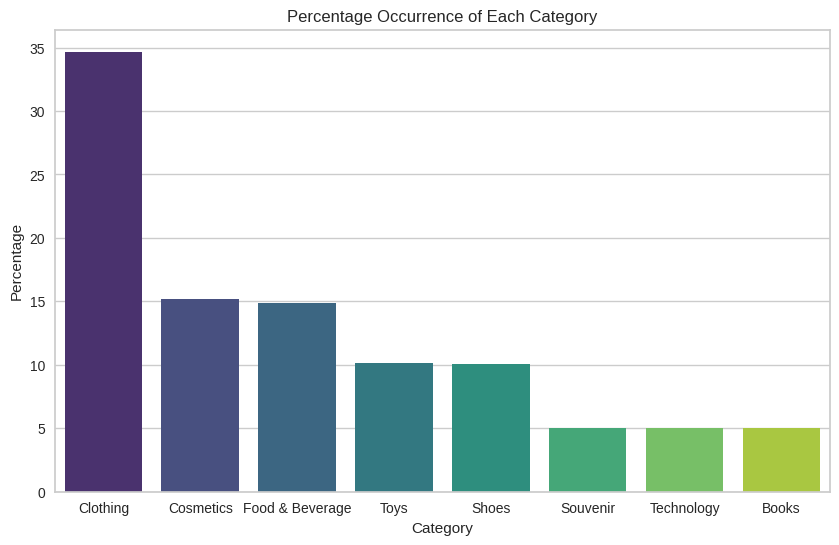

In [109]:
category_counts = data['category'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Percentage Occurrence of Each Category')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

**Top 3 catagories are Clothes  Cosmetic and Food **

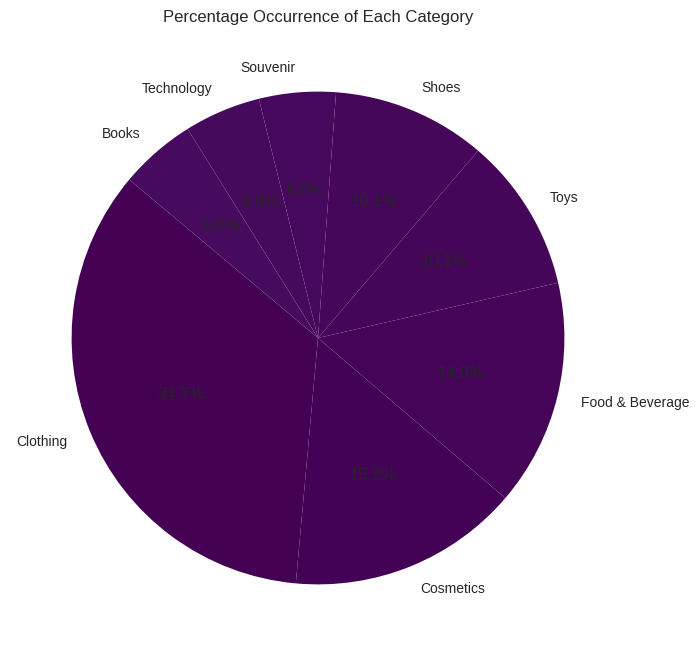

In [110]:
category_counts = data['category'].value_counts(normalize=True) * 100

# Plot the percentage occurrence of categories as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(category_counts))))
plt.title('Percentage Occurrence of Each Category')
plt.show()

# Shopping Mall

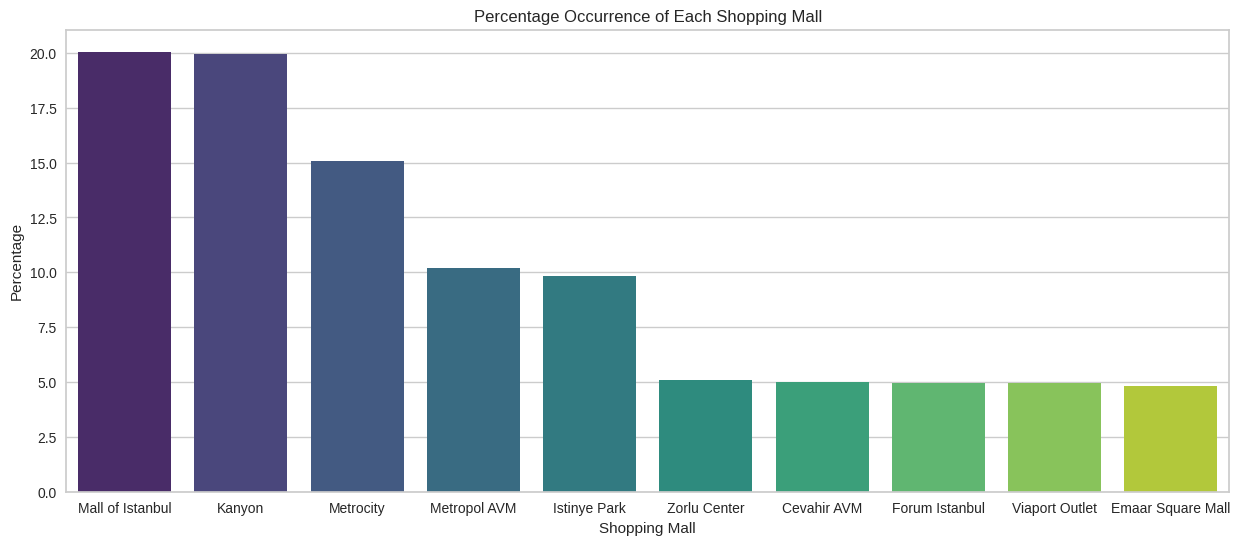

In [111]:
# Calculate percentage occurrence of each shopping mall
mall_counts = data['shopping_mall'].value_counts(normalize=True) * 100

# Plot the percentage occurrence of shopping malls
plt.figure(figsize=(15, 6))
sns.barplot(x=mall_counts.index, y=mall_counts.values, palette='viridis')
plt.title('Percentage Occurrence of Each Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Percentage')
plt.show()

In [150]:
data['shopping_mall'].value_counts(normalize=True).head()

shopping_mall
Mall of Istanbul    0.200455
Kanyon              0.199037
Metrocity           0.151166
Metropol AVM        0.102185
Istinye Park        0.098314
Name: proportion, dtype: float64

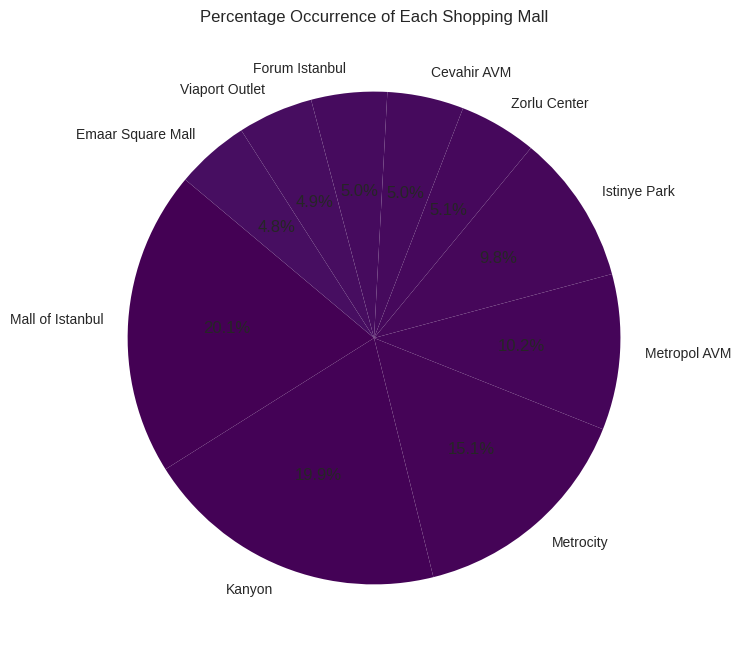

In [112]:
# Calculate percentage occurrence of each shopping mall
mall_counts = data['shopping_mall'].value_counts(normalize=True) * 100

# Plot the percentage occurrence of shopping malls as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(mall_counts, labels=mall_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(range(len(mall_counts))))
plt.title('Percentage Occurrence of Each Shopping Mall')
plt.show()

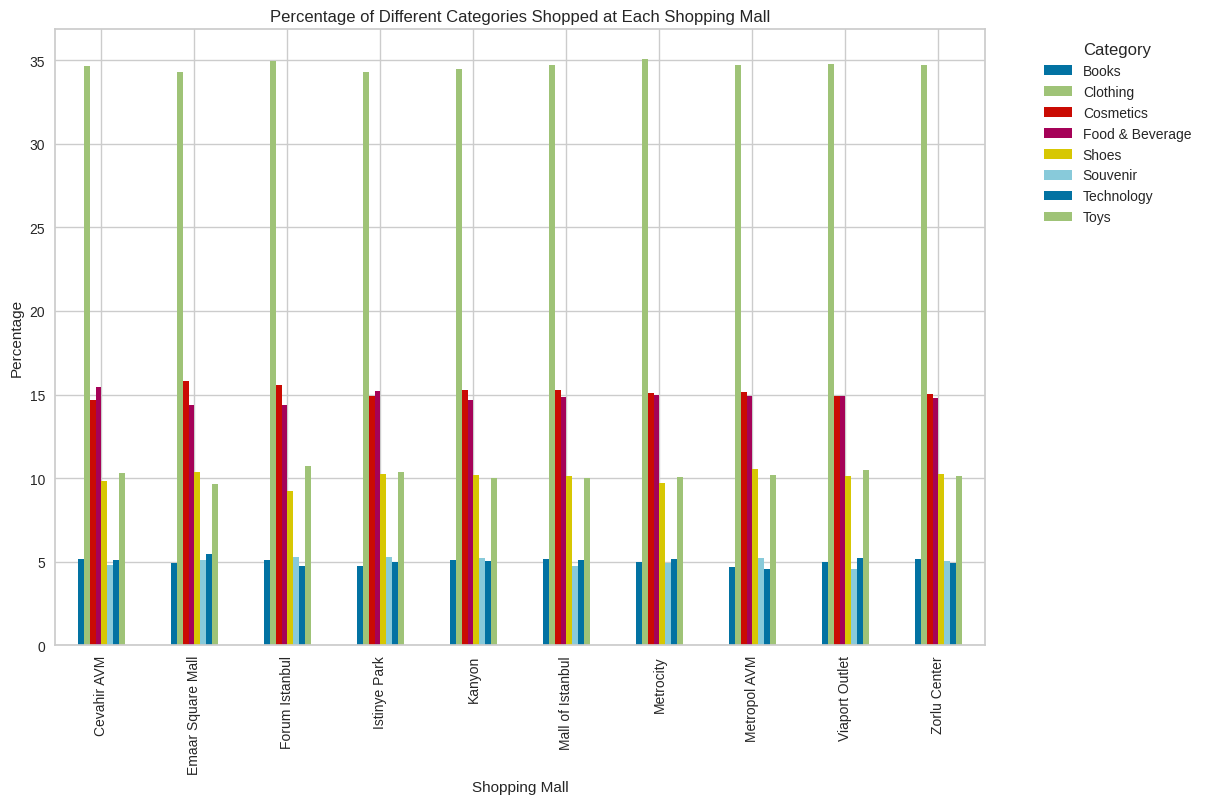

In [113]:
# Calculate the count of categories for each shopping mall
mall_category_counts = data.groupby(['shopping_mall', 'category']).size().unstack(fill_value=0)

# Calculate the percentage of each category for each shopping mall
mall_category_percentages = mall_category_counts.div(mall_category_counts.sum(axis=1), axis=0) * 100

# Plot the grouped bar chart
mall_category_percentages.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Percentage of Different Categories Shopped at Each Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Percentage')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

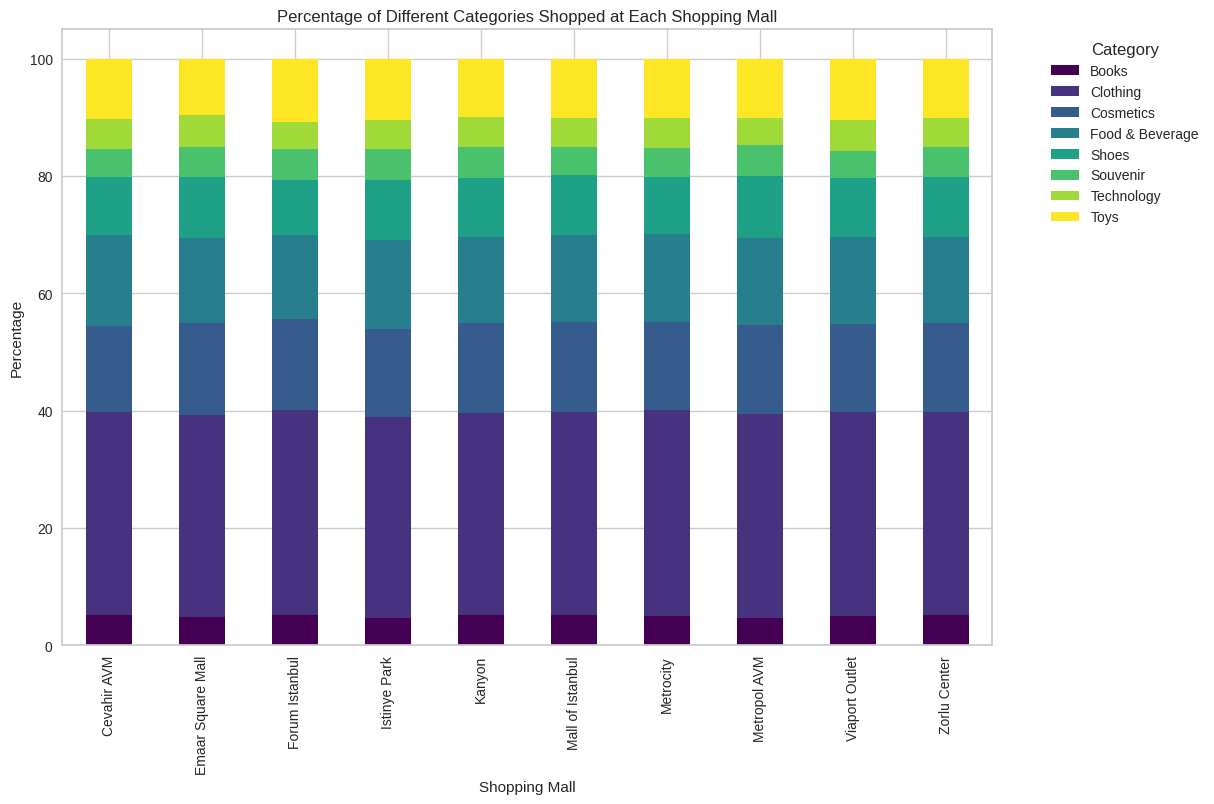

In [114]:
# Calculate the count of categories for each shopping mall
mall_category_counts = data.groupby(['shopping_mall', 'category']).size().unstack(fill_value=0)

# Calculate the percentage of each category for each shopping mall
mall_category_percentages = mall_category_counts.div(mall_category_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
mall_category_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Percentage of Different Categories Shopped at Each Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Percentage')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Insights:
Here above shows that Mall Of Istambul Kanyon and Metro city are top 3 Mall where customer visit frequency is High while Clothes , cosmatics  and Food & Bevrages are the Catagories which are most purchased

In [115]:
pip install plotly

In [116]:
import plotly.express as px
# Calculate the count of categories for each shopping mall
mall_category_counts = data.groupby(['shopping_mall', 'category']).size().unstack(fill_value=0)

# Calculate the percentage of each category for each shopping mall
mall_category_percentages = mall_category_counts.div(mall_category_counts.sum(axis=1), axis=0) * 100

# Reset index for Plotly
mall_category_percentages = mall_category_percentages.reset_index()

# Melt the dataframe to a long format
melted_df = mall_category_percentages.melt(id_vars='shopping_mall', var_name='category', value_name='percentage')

# Create an interactive stacked bar chart
fig = px.bar(melted_df,
             x='shopping_mall',
             y='percentage',
             color='category',
             title='Percentage of Different Categories Shopped at Each Shopping Mall',
             labels={'shopping_mall': 'Shopping Mall', 'percentage': 'Percentage'},
             barmode='stack')

# Update layout for better appearance
fig.update_layout(xaxis={'categoryorder': 'total descending'}, yaxis_tickformat='%')

# Show the plot
fig.show()

In [117]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,138884,241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,317333,111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,127801,266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,173702,988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,337046,189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


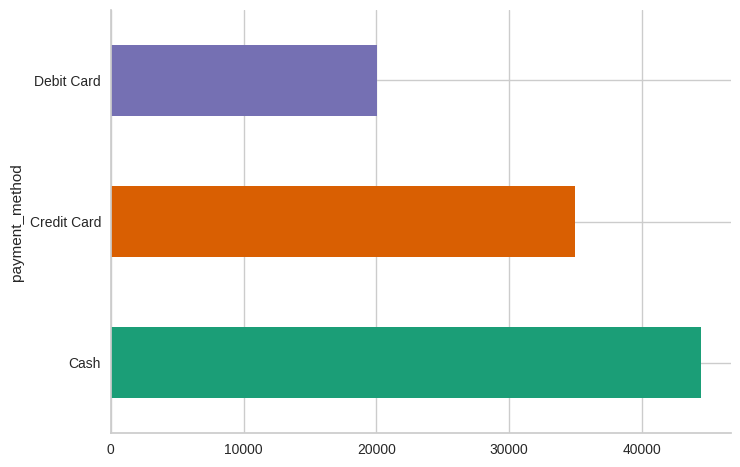

In [118]:
# @title payment_method

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('payment_method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Cash is most Frequent Method

# Gender

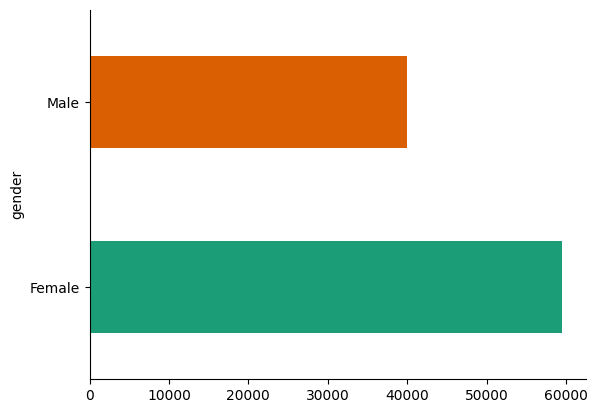

In [31]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [120]:
data['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

In [121]:
import plotly.express as px
plt.figure(figsize=(20, 6))
# Count purchases per date
purchase_counts = data['invoice_date'].value_counts().reset_index()
purchase_counts.columns = ['invoice_date', 'count']

# Get top 20 most purchasing dates
top20_dates = purchase_counts.nlargest(20, 'count')

# Sort the dates for better visualization
top20_dates = top20_dates.sort_values(by='invoice_date')

# Plot the top 20 most purchasing dates
fig = px.bar(top20_dates,
             x='invoice_date',
             y='count',
             title='Top 20 Most Purchasing Dates',
             labels={'invoice_date': 'Invoice Date', 'count': 'Number of Purchases'},
             template='plotly')

fig.show()

<Figure size 2000x600 with 0 Axes>

In [122]:
data['invoice_date'].max()

'9/9/2022'

In [123]:
data['invoice_date'].min()

'1/1/2021'

In [124]:
 #Convert invoice_date to datetime with correct format
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d/%m/%Y')

# Get max year
max_year = data['invoice_date'].dt.year.max()
print(f"Max Year: {max_year}")

# Filter out rows with max year
data = data[data['invoice_date'].dt.year != max_year]

# Check max year after filtering
max_year_after_filtering = data['invoice_date'].dt.year.max()
print(f"Max Year after filtering: {max_year_after_filtering}")

Max Year: 2023
Max Year after filtering: 2022


In [125]:
data['shopping_mall'].value_counts(normalize=True).head()

shopping_mall
Mall of Istanbul    0.200455
Kanyon              0.199037
Metrocity           0.151166
Metropol AVM        0.102185
Istinye Park        0.098314
Name: proportion, dtype: float64

In [126]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,127801,266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


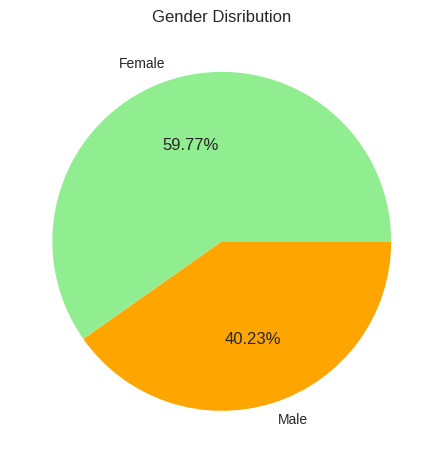

In [127]:
df = data.groupby('gender').size()

df.plot(kind='pie', subplots = True,
       colors = ['lightgreen', 'orange'],
       explode = [0, 0.001],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%' )
plt.title("Gender Disribution")
plt.ylabel("")
plt.show()

In [128]:
data.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,127801,266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


# Age

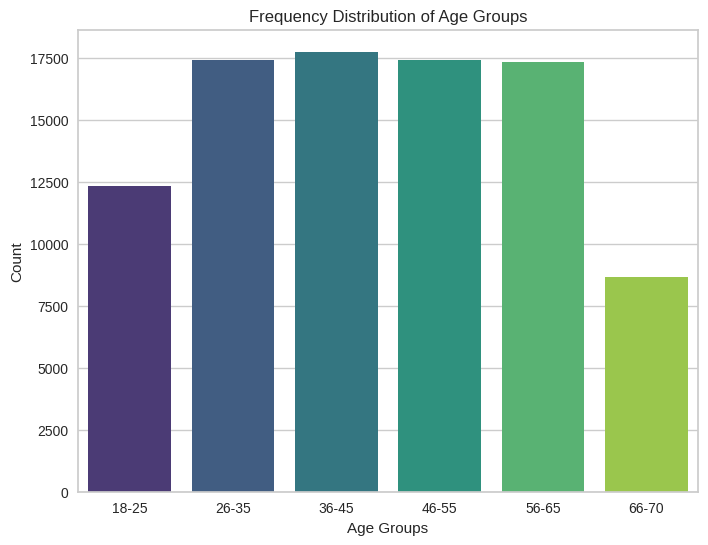

In [130]:

bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)


age_group_counts = data['age_group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Frequency Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

Most Highest age group is 36 to 45

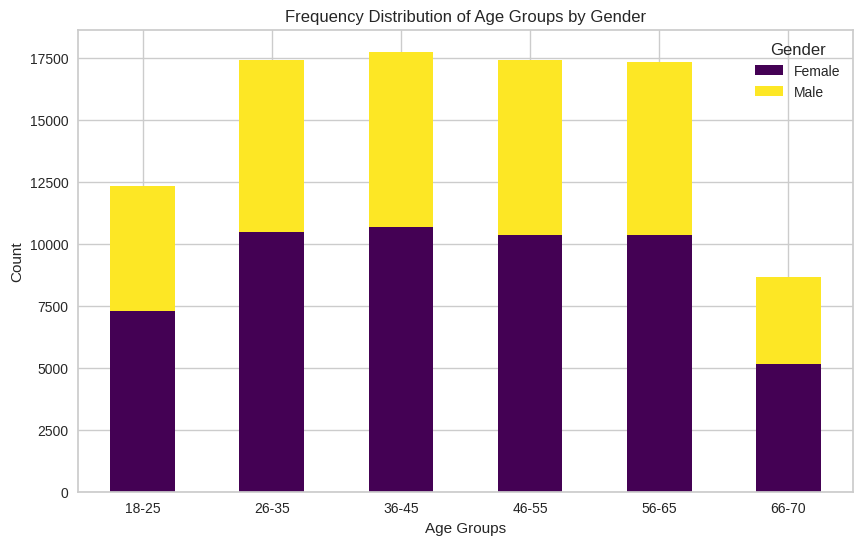

In [131]:
#Create age groups
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate the frequency distribution of age groups and gender
age_gender_counts = data.groupby(['age_group', 'gender']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
age_gender_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Frequency Distribution of Age Groups by Gender')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

# insights
Female frquecny is high in all age groups

In [132]:
#data= data.drop(columns=['age_group'])
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,26-35
1,317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-25
2,127801,266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,18-25
3,173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,66-70
4,337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,46-55


In [133]:
data['Total_Spend'] = data['price'] * data['quantity']
total_spend = data.groupby('customer_id')['Total_Spend'].sum().reset_index()
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,Total_Spend
0,138884,241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,26-35,7502.00
1,317333,111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-25,5401.53
2,127801,266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,18-25,300.08
3,173702,988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,66-70,15004.25
4,337046,189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,46-55,242.40


In [134]:
data = data.drop(columns=['quantity', 'price'])
data.head()

,invoice_no,customer_id,gender,age,category,payment_method,invoice_date,shopping_mall,age_group,Total_Spend
0,138884,241288,Female,28,Clothing,Credit Card,2022-08-05,Kanyon,26-35,7502.00
1,317333,111565,Male,21,Shoes,Debit Card,2021-12-12,Forum Istanbul,18-25,5401.53
2,127801,266599,Male,20,Clothing,Cash,2021-11-09,Metrocity,18-25,300.08
3,173702,988172,Female,66,Shoes,Credit Card,2021-05-16,Metropol AVM,66-70,15004.25
4,337046,189076,Female,53,Books,Cash,2021-10-24,Kanyon,46-55,242.40


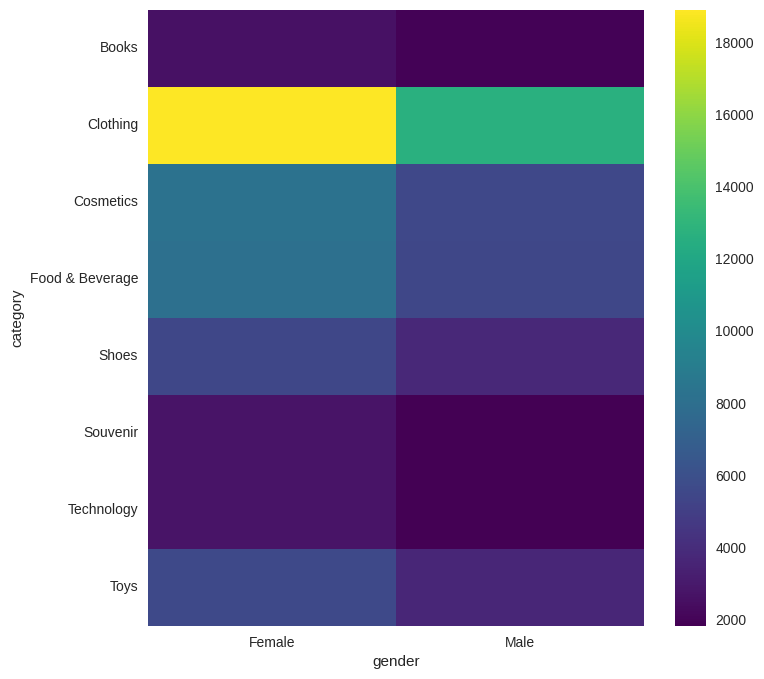

In [135]:
# @title gender vs category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in data.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('category')

In [136]:
data = data.drop(columns=['invoice_no', 'customer_id'])

In [137]:
data.head()

,gender,age,category,payment_method,invoice_date,shopping_mall,age_group,Total_Spend
0,Female,28,Clothing,Credit Card,2022-08-05,Kanyon,26-35,7502.00
1,Male,21,Shoes,Debit Card,2021-12-12,Forum Istanbul,18-25,5401.53
2,Male,20,Clothing,Cash,2021-11-09,Metrocity,18-25,300.08
3,Female,66,Shoes,Credit Card,2021-05-16,Metropol AVM,66-70,15004.25
4,Female,53,Books,Cash,2021-10-24,Kanyon,46-55,242.40


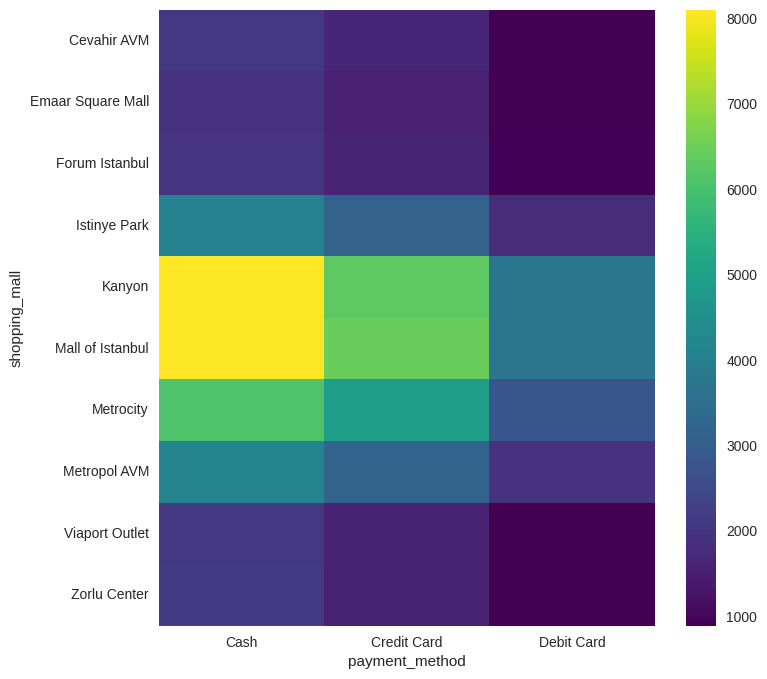

In [138]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['shopping_mall'].value_counts()
    for x_label, grp in data.groupby('payment_method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('payment_method')
_ = plt.ylabel('shopping_mall')

Cahs Payment method is frquently use in different Shoping malls

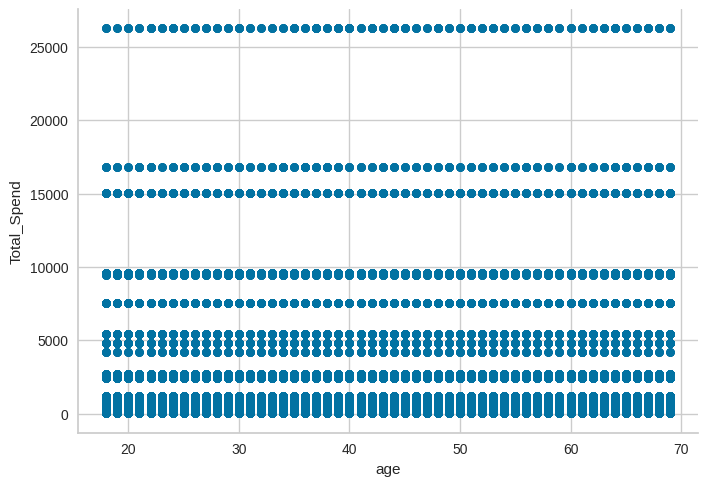

In [139]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='Total_Spend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

All age people are Spending  more Between 5 LT to 6000 LT

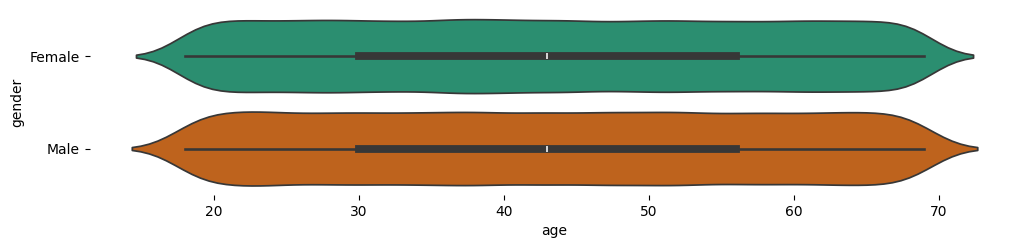

In [56]:
# @title gender vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

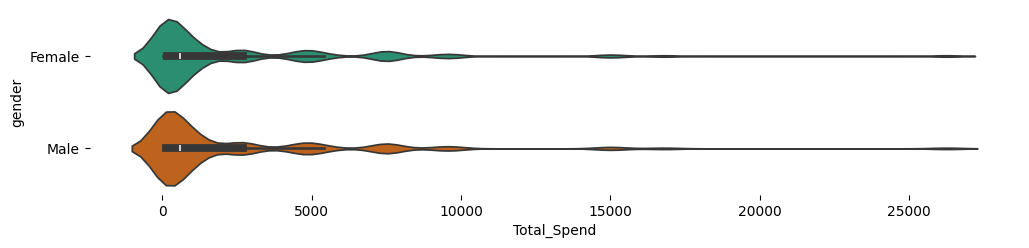

In [55]:
# @title gender vs Total_Spend

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Total_Spend', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

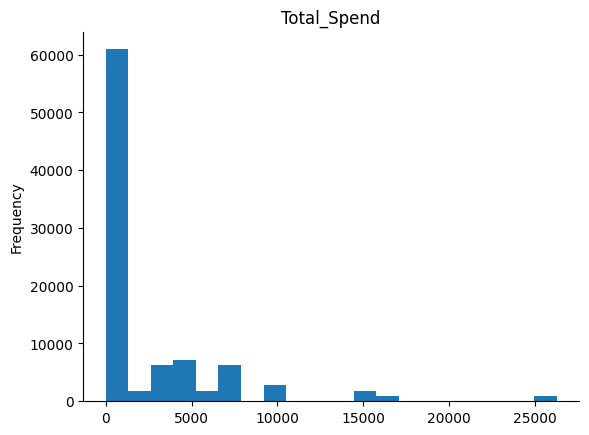

In [53]:
# @title Total_Spend

from matplotlib import pyplot as plt
data['Total_Spend'].plot(kind='hist', bins=20, title='Total_Spend')
plt.gca().spines[['top', 'right',]].set_visible(False)

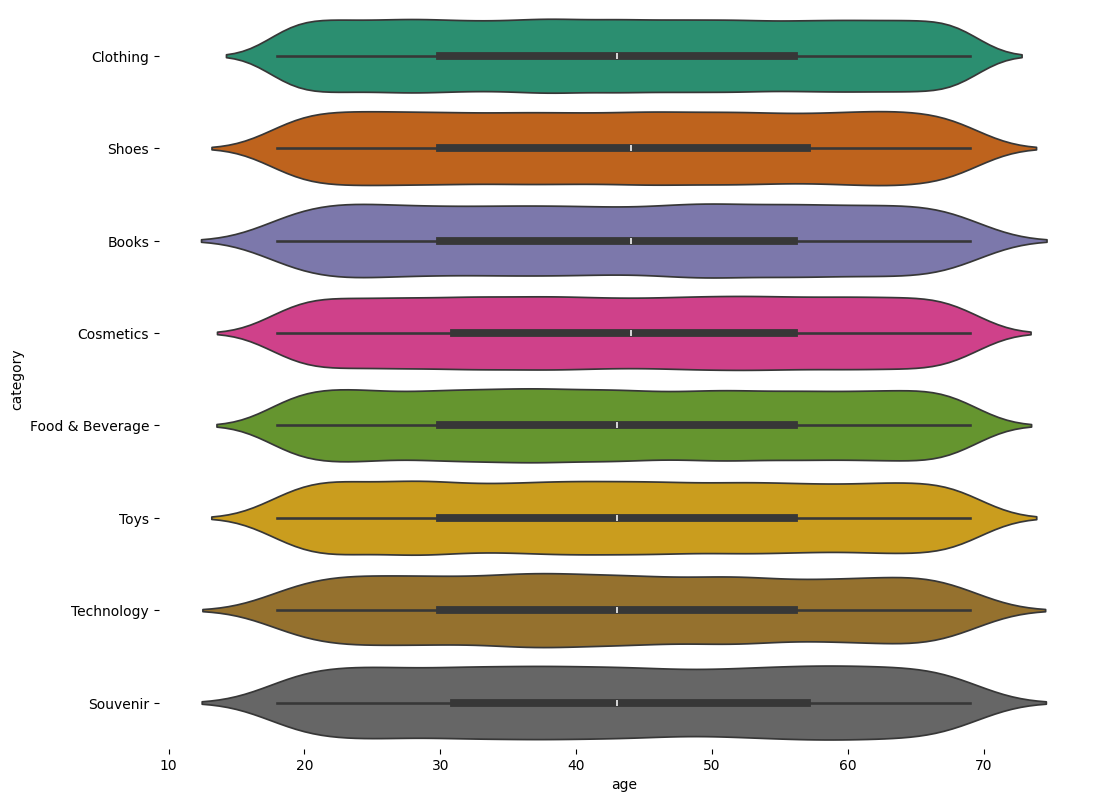

In [52]:
# @title category vs age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='age', y='category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Gender Vs Total Spenthing

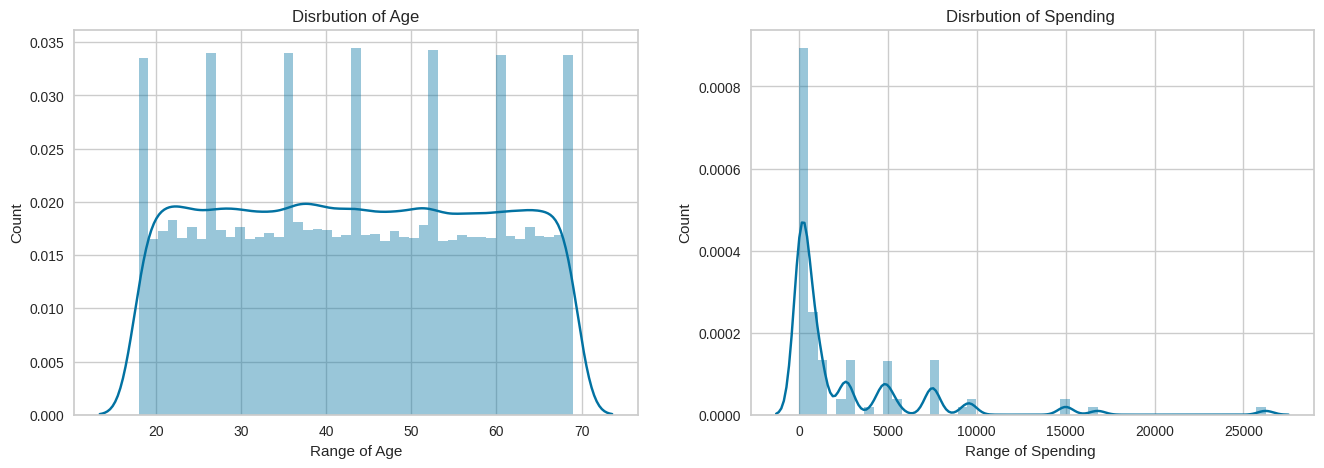

In [140]:
plt.figure(figsize = (16,5))

plt.subplot(1, 2, 1)
sns.distplot(data['age'])
plt.title("Disrbution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")



plt.subplot(1, 2, 2)
sns.distplot(data['Total_Spend'])
plt.title("Disrbution of Spending ")
plt.xlabel("Range of Spending ")
plt.ylabel("Count")
plt.show()

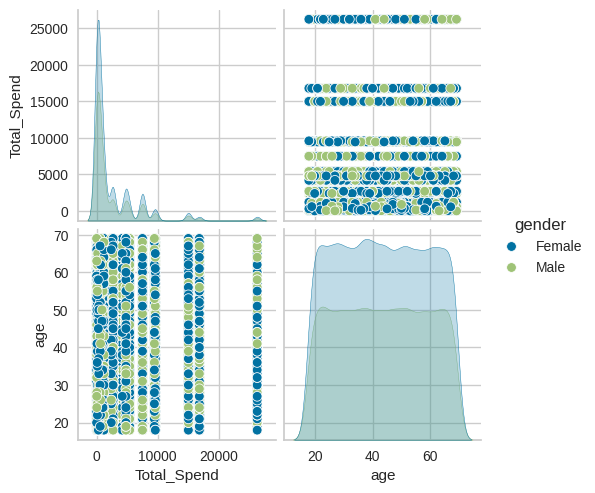

In [141]:
sns.pairplot(data, vars = ['Total_Spend', 'age'], hue = 'gender')

Females Spending more then male from all age groups

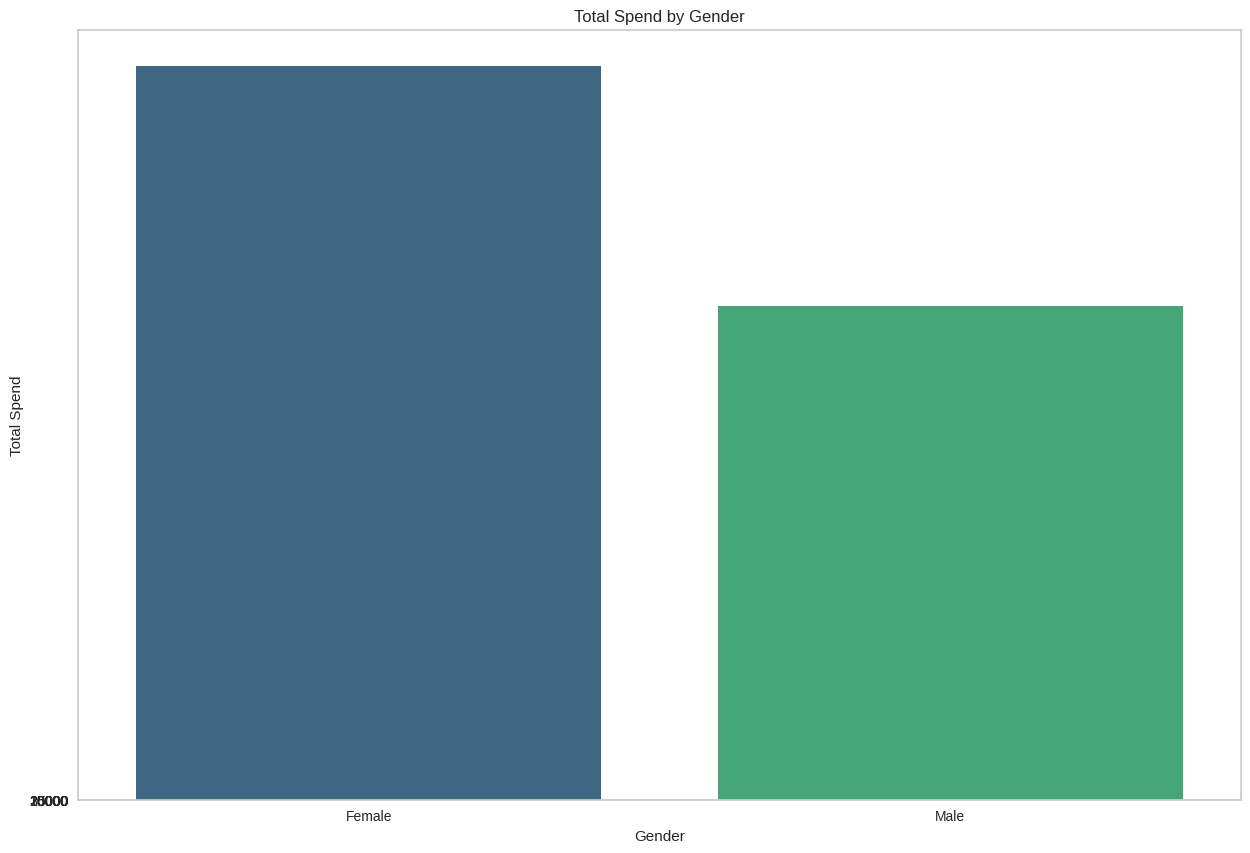

In [142]:
# Calculate the total spend by gender
total_spend_by_gender = data.groupby('gender')['Total_Spend'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='gender', y='Total_Spend', data=total_spend_by_gender, palette='viridis')
plt.title('Total Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
# Set y-axis bins range from 5000 to 30000
y_bins = range(5000, 35000, 5000)
plt.yticks(y_bins)

plt.show()

# Age and TOtal Spending

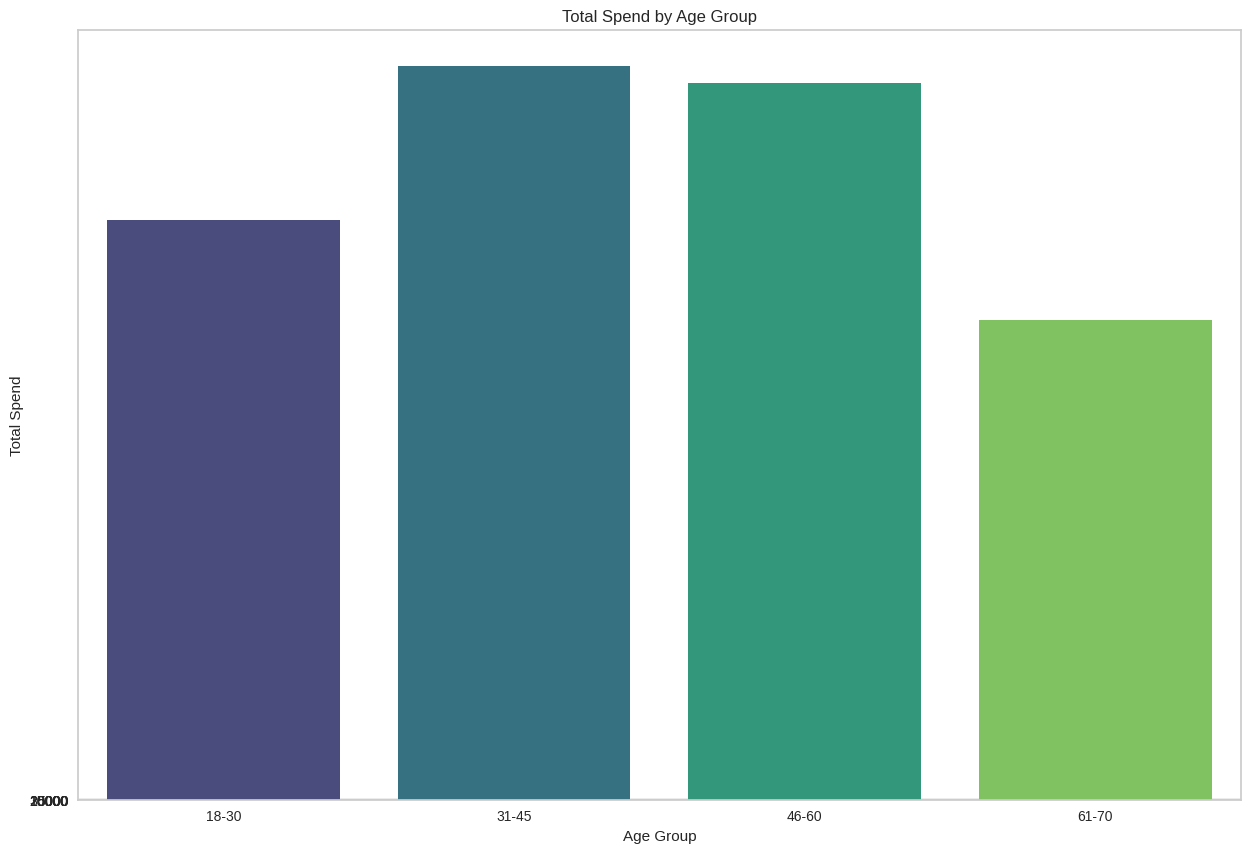

In [143]:
 #Create age groups
bins = [18, 30, 45, 60, 70]
labels = ['18-30', '31-45', '46-60', '61-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate the total spend by age group
total_spend_by_age_group = data.groupby('age_group')['Total_Spend'].sum().reset_index()

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='age_group', y='Total_Spend', data=total_spend_by_age_group, palette='viridis')
plt.title('Total Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spend')

# Set y-axis bins range from 5000 to 30000
y_bins = range(5000, 35000, 5000)
plt.yticks(y_bins)

plt.show()

In [144]:
data.describe()

,age,invoice_date,Total_Spend
count,90933.000000,90933,90933.000000
mean,43.432978,2022-01-01 00:21:12.250997760,2529.306024
min,18.000000,2021-01-01 00:00:00,5.230000
25%,30.000000,2021-07-03 00:00:00,136.350000
50%,43.000000,2022-01-01 00:00:00,600.170000
75%,56.000000,2022-07-02 00:00:00,2700.720000
max,69.000000,2022-12-31 00:00:00,26250.000000
std,14.990631,NaN,4218.831875


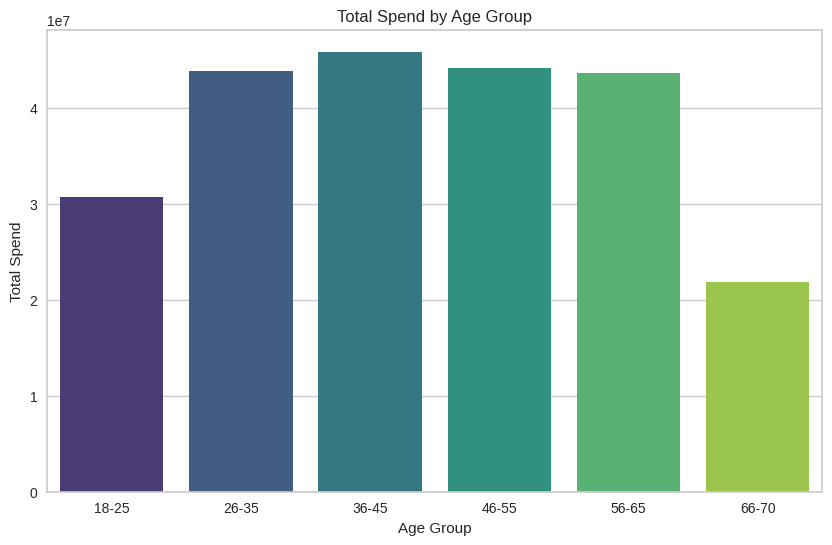

In [145]:
 #Create age groups
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate the total spend by age group
total_spend_by_age_group = data.groupby('age_group')['Total_Spend'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Total_Spend', data=total_spend_by_age_group, palette='viridis')
plt.title('Total Spend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spend')
plt.show()

# Gender Vs Catagory

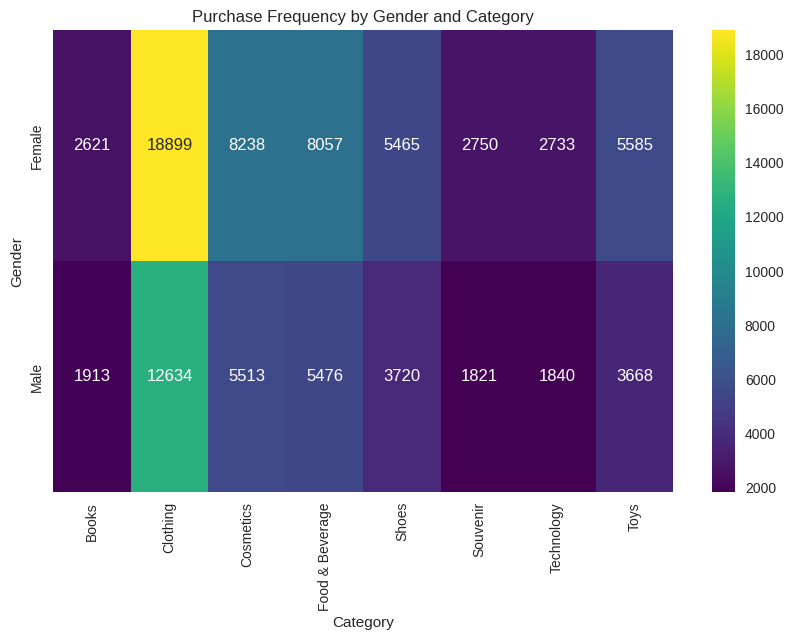

In [146]:
gender_category_counts = data.groupby(['gender', 'category']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(gender_category_counts, annot=True, cmap='viridis', fmt='g')
plt.title('Purchase Frequency by Gender and Category')
plt.xlabel('Category')
plt.ylabel('Gender')
plt.show()

Females are purchasing more clothes, cosmetic  and food
Each gender focusing on clothes while females are also spendig on cosmatics

# Age vs Catagory

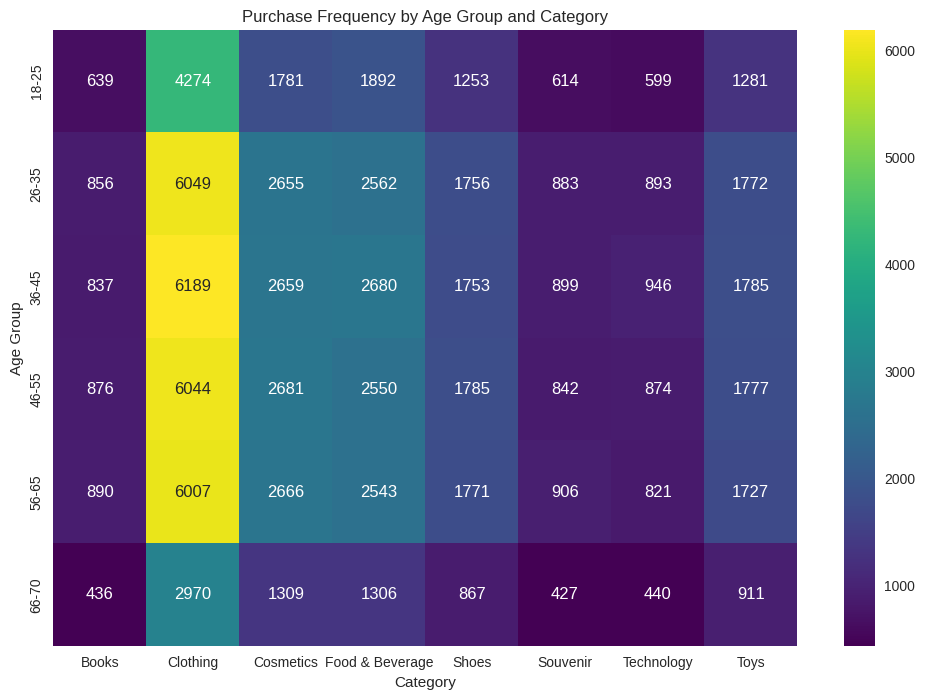

In [147]:
bins = [18, 25, 35, 45, 55, 65, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate count of transactions by age group and category
age_category_counts = data.groupby(['age_group', 'category']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(age_category_counts, annot=True, cmap='viridis', fmt='g')
plt.title('Purchase Frequency by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.show()

The people age 26 to 56 are shoping more while in these gropus gender Female spend more

In [152]:
# Group the data by gender, age group, and category, then sum the total spend
spending_patterns = data.groupby(['gender', 'age_group', 'category'])['Total_Spend'].sum().reset_index()

# Find the maximum spending for each gender and age group combination
max_spending = spending_patterns.loc[spending_patterns.groupby(['gender', 'age_group'])['Total_Spend'].idxmax()]

print(max_spending)

    gender age_group  category  Total_Spend
1   Female     18-30  Clothing  14878866.64
9   Female     31-45  Clothing  17887168.64
17  Female     46-60  Clothing  17917176.64
25  Female     61-70  Clothing  11944084.24
33    Male     18-30  Clothing   9373598.96
41    Male     31-45  Clothing  12017903.92
49    Male     46-60  Clothing  12302679.84
57    Male     61-70  Clothing   8037342.72


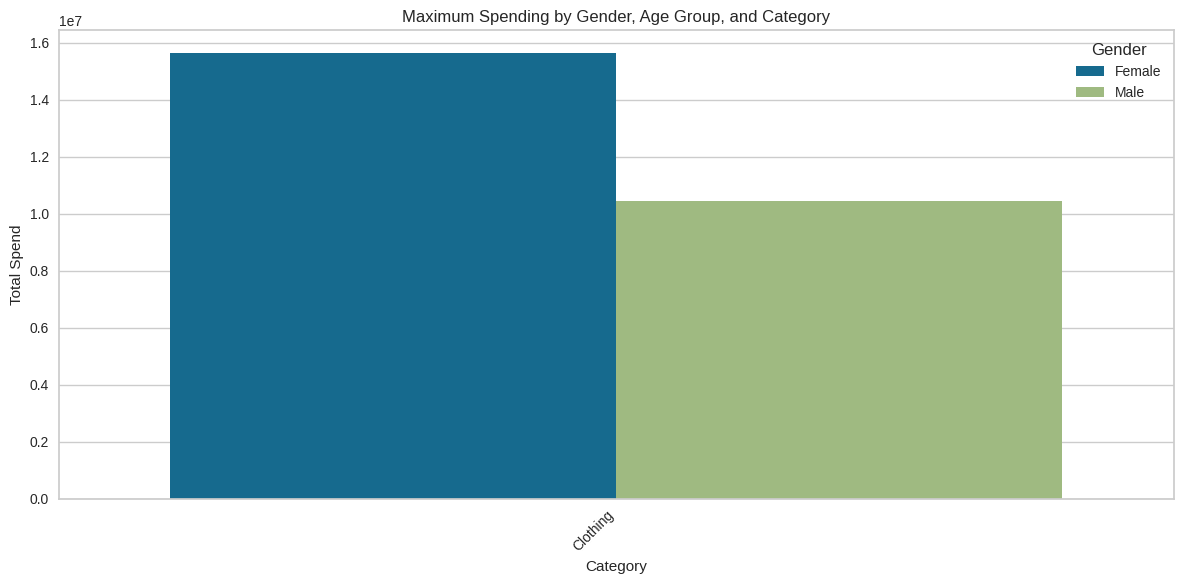

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for plotting
pivot_table = max_spending.pivot(index=['gender', 'age_group'], columns='category', values='Total_Spend')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table.reset_index().melt(id_vars=['gender', 'age_group']),
            x='category', y='value', hue='gender',
            ci=None)  # Remove confidence intervals for clarity
plt.title('Maximum Spending by Gender, Age Group, and Category')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [154]:
# Group the data by gender, age group, and category, then sum the total spend
spending_patterns = data.groupby(['gender', 'age_group', 'category'])['Total_Spend'].sum().reset_index()

# Sort the data by Total_Spend in descending order
spending_patterns_sorted = spending_patterns.sort_values('Total_Spend', ascending=False)

# Get the top 2 categories for the highest spending gender and age group combination
top_2_categories = spending_patterns_sorted.iloc[:2]

print(top_2_categories)

    gender age_group  category  Total_Spend
17  Female     46-60  Clothing  17917176.64
9   Female     31-45  Clothing  17887168.64


In [78]:
# Category where females spend the most
female_spending = data[data['gender'] == 'Female'].groupby('category')['Total_Spend'].sum()
print(female_spending.idxmax())

Clothing


# K mean

In [76]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [77]:
data.head(10)

,gender,age,category,payment_method,invoice_date,shopping_mall,age_group,Total_Spend
0,Female,28,Clothing,Credit Card,2022-08-05,Kanyon,18-30,7502.00
1,Male,21,Shoes,Debit Card,2021-12-12,Forum Istanbul,18-30,5401.53
2,Male,20,Clothing,Cash,2021-11-09,Metrocity,18-30,300.08
3,Female,66,Shoes,Credit Card,2021-05-16,Metropol AVM,61-70,15004.25
4,Female,53,Books,Cash,2021-10-24,Kanyon,46-60,242.40
5,Female,28,Clothing,Credit Card,2022-05-24,Forum Istanbul,18-30,7502.00
6,Female,49,Cosmetics,Cash,2022-03-13,Istinye Park,46-60,40.66
7,Female,32,Clothing,Credit Card,2021-01-13,Mall of Istanbul,31-45,1200.32
8,Male,69,Clothing,Credit Card,2021-11-04,Metrocity,61-70,2700.72
9,Female,60,Clothing,Credit Card,2021-08-22,Kanyon,61-70,1200.32


In [158]:

# Select relevant columns for clustering

X2 = data[['gender', 'Total_Spend']]

In [159]:
print(data['age_group'].dtype)  # Or print(data['age_group_encoded'].dtype)

category


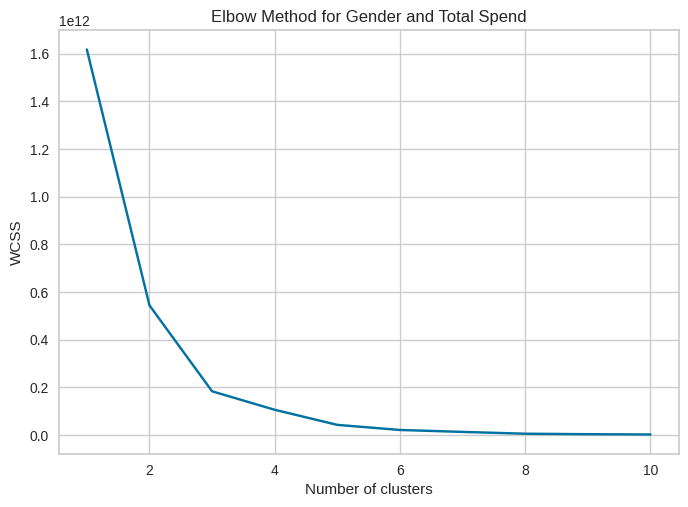

In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender_encoded'] = le.fit_transform(data['gender'])

# Update X2 with the encoded column
X2 = data[['gender_encoded', 'Total_Spend']]
#d Elbow method for X2 (gender and total spend)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Gender and Total Spend')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We will select K=5 Mean that  cluster

In [161]:
# Assuming optimal K is 5 based on the Elbow method


kmeans2 = KMeans(n_clusters=5, random_state=42)
data['gender_spend_cluster'] = kmeans2.fit_predict(X2)

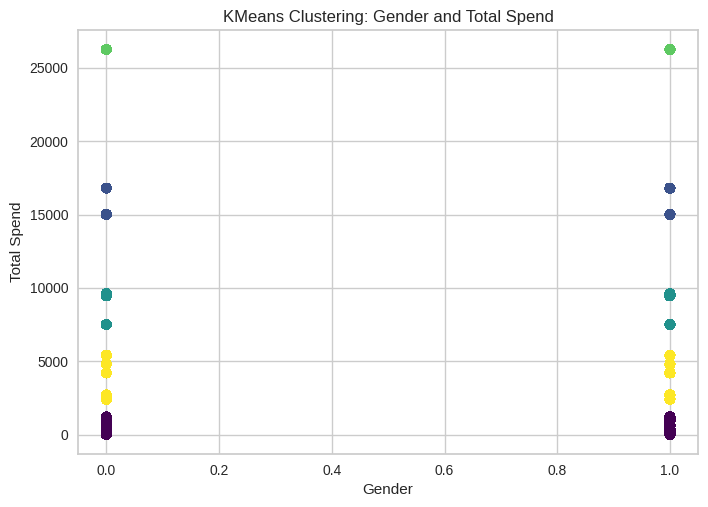

In [162]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.scatter(data['gender_encoded'], data['Total_Spend'], c=data['gender_spend_cluster'], cmap='viridis')
plt.title('KMeans Clustering: Gender and Total Spend')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.show()

In [87]:
female_spending = data[data['gender'] == 'Female'].groupby('category')['Total_Spend'].sum()
print(female_spending.idxmax())

Clothing


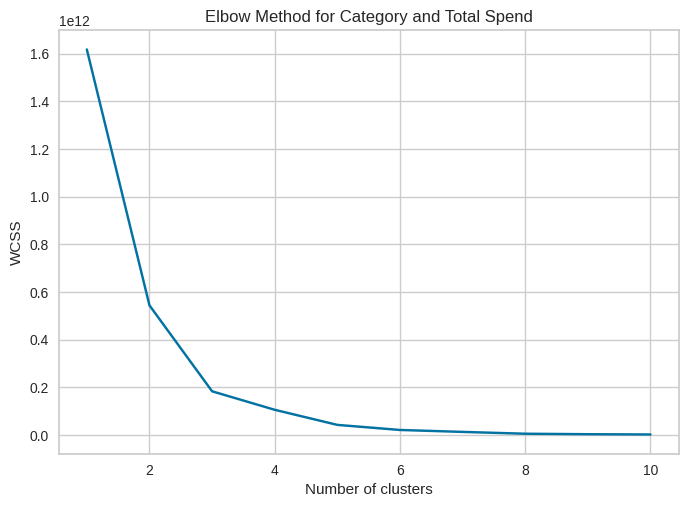

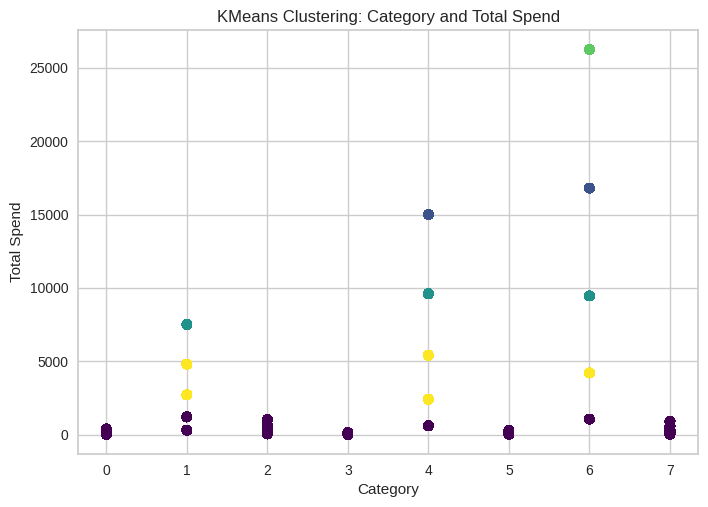

category_spend_cluster
0      385.450440
1    15593.734347
2     8123.735854
3    26250.000000
4     3802.709809
Name: Total_Spend, dtype: float64


In [164]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode 'category' numerically using LabelEncoder
le = LabelEncoder()
data['category_encoded'] = le.fit_transform(data['category'])

X = data[['category_encoded', 'Total_Spend']]

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Category and Total Spend')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform KMeans with chosen number of clusters 5
kmeans = KMeans(n_clusters=5, random_state=42)
data['category_spend_cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(data['category_encoded'], data['Total_Spend'], c=data['category_spend_cluster'], cmap='viridis')
plt.title('KMeans Clustering: Category and Total Spend')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.show()

# Analyze clusters to identify high-spending categories
# For example, you can calculate the average 'Total_Spend' for each cluster:
cluster_means = data.groupby('category_spend_cluster')['Total_Spend'].mean()
print(cluster_means)

# Conclusion
In Istambul We analized data  where customer are more intrest to buy 3 catagory clothes , cosmetics and Food and somwhere shoes . from gender female are spending more  age group specifically 36 to 45 gender female   are highly spend  to busy clothes, and cosmetics. Peopole are visit the Mall of Istambool


# Recommandation
For new Business
1.target The women Age 25 to 45 to increase sale
2. Targeted  Product will be clothes , Cosmetics and food & bevarages
